# Proyek Analisis Data
Oleh Muhammad Dava Pasha (Dicoding)
- Menggunakan Dataset ['Bike Sharing'](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data) yang disebut juga menyewa sepeda.


## Tujuan
- Mencari berapa banyak peminat menyewa sepeda dalam jangka waktu bulan dan pengaruh terhadap cuaca.
- Mencari berapa banyak penyewa yang minat untuk menggunakan sepeda dalam cuaca gerimis.

## Menyiapkan semua library yang dibutuhkan

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling
### Gathering Data

In [276]:
day_raw = pd.read_csv('./data/day.csv')
day_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data
Menilai table `day_raw`

In [277]:
day_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [278]:
day_raw.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [279]:
print('Jumlah duplikasi: ', day_raw.duplicated().sum())

Jumlah duplikasi:  0


In [280]:
day_raw.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [281]:
# Mengkonversi data raw date ke format panda untuk lebih gampang diolah
day_raw['dteday'] = pd.to_datetime(day_raw['dteday'])

# Mengestrak hari, bulan dan tahun dari dteday
day_raw['day'] = day_raw['dteday'].dt.day
day_raw['month'] = day_raw['dteday'].dt.month
day_raw['year'] = day_raw['dteday'].dt.year

## Cleaning data
Cek jika ada null or Nan values

In [282]:
null_count = day_raw.isnull().sum()

Drop Nan values jika ada

In [283]:
day_raw.dropna(inplace = True)

## Exploratory Data Analysis (EDA)
Explore `day_raw`

In [284]:
day_raw.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
373,374,2012-01-09,1,1,1,0,1,1,2,0.224167,0.247479,0.701667,0.098900,106,2270,2376,9,1,2012
193,194,2011-07-13,3,0,7,0,3,1,1,0.746667,0.689404,0.631667,0.146133,748,3594,4342,13,7,2011
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891,14,6,2011
53,54,2011-02-23,1,0,2,0,3,1,1,0.221739,0.245717,0.423043,0.094113,139,1778,1917,23,2,2011
714,715,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047,15,12,2012


In [285]:
day_raw.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714,6.519836,2011.500684
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000,1.000000,2011.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000,4.000000,2011.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000,7.000000,2012.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000,10.000000,2012.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000,12.000000,2012.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949,3.451913,0.500342


In [286]:
day_raw.instant.is_unique

True

### Keterangan cuaca
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [287]:
# Ubah nomer cuaca ke tulisan agar lebih gampang dipahami
raw_weather = day_raw['weathersit']
day_raw['weathersit'] = raw_weather.replace(1, 'Cerah').replace(2, 'Mendung').replace(3, 'Gerimis').replace(4, 'Deras')

In [288]:
data = day_raw.groupby(by='weathersit').agg({
    'casual': ['max', 'min', 'mean', 'std'],
    'registered': ['max', 'min', 'mean', 'std']
})
data

casual                             registered                    \
              max min        mean         std        max  min         mean   
weathersit                                                                   
Cerah        3410  15  964.030238  700.476488       6946  416  3912.755940   
Gerimis      1264   2  185.476190  260.975022       4324   20  1617.809524   
Mendung      3155   9  687.352227  619.082767       6844  491  3348.510121   

                         
                    std  
weathersit               
Cerah       1533.347265  
Gerimis     1068.290954  
Mendung     1463.566884

In [289]:
day_raw[day_raw['weathersit'] == 'Cerah'].groupby(by='weathersit').agg({
    'casual': ['max', 'min', 'mean', 'std'],
    'registered': ['max', 'min', 'mean', 'std']
})

casual                             registered                   \
              max min        mean         std        max  min        mean   
weathersit                                                                  
Cerah        3410  15  964.030238  700.476488       6946  416  3912.75594   

                         
                    std  
weathersit               
Cerah       1533.347265

In [290]:
day_raw[day_raw['weathersit'] == 'Gerimis'].groupby(by='weathersit').agg({
    'casual': ['max', 'min', 'mean', 'std'],
    'registered': ['max', 'min', 'mean', 'std']
})

casual                            registered                   \
              max min       mean         std        max min         mean   
weathersit                                                                 
Gerimis      1264   2  185.47619  260.975022       4324  20  1617.809524   

                         
                    std  
weathersit               
Gerimis     1068.290954

## Visualization & Explanatory Analysis
Bagaimana pengaruh cuaca terhadap penyewa?

In [291]:
data

casual                             registered                    \
              max min        mean         std        max  min         mean   
weathersit                                                                   
Cerah        3410  15  964.030238  700.476488       6946  416  3912.755940   
Gerimis      1264   2  185.476190  260.975022       4324   20  1617.809524   
Mendung      3155   9  687.352227  619.082767       6844  491  3348.510121   

                         
                    std  
weathersit               
Cerah       1533.347265  
Gerimis     1068.290954  
Mendung     1463.566884

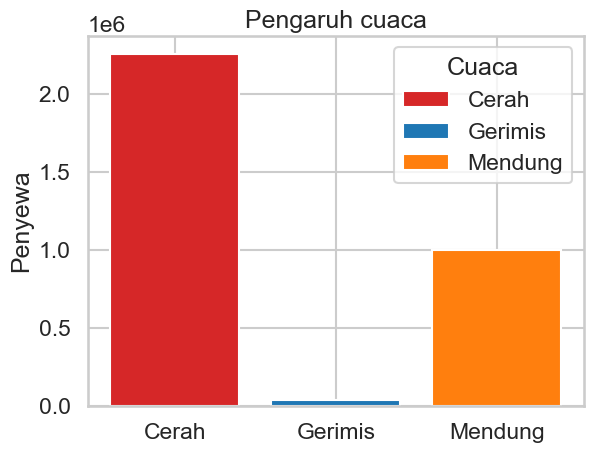

In [292]:
total_dalam_cerah = day_raw[day_raw['weathersit'] == 'Cerah'].groupby(by='weathersit').agg({
    'cnt': ['sum'],
}).sum().reset_index()[0][0]

total_dalam_gerimis = day_raw[day_raw['weathersit'] == 'Gerimis'].groupby(by='weathersit').agg({
    'cnt': ['sum'],
}).sum().reset_index()[0][0]

total_dalam_mendung = day_raw[day_raw['weathersit'] == 'Mendung'].groupby(by='weathersit').agg({
    'cnt': ['sum'],
}).sum().reset_index()[0][0]

fig, ax = plt.subplots()
bar_labels = ['Cerah', 'Gerimis', 'Mendung']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(['Cerah', 'Gerimis', 'Mendung'], [total_dalam_cerah, total_dalam_gerimis, total_dalam_mendung], label=bar_labels, color=bar_colors)

ax.set_ylabel('Penyewa')
ax.set_title('Pengaruh cuaca')
ax.legend(title='Cuaca')

plt.show()

In [293]:
jumlah_perbulan = day_raw.groupby(by='mnth')['cnt'].sum().reset_index()
jumlah_perbulan


,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


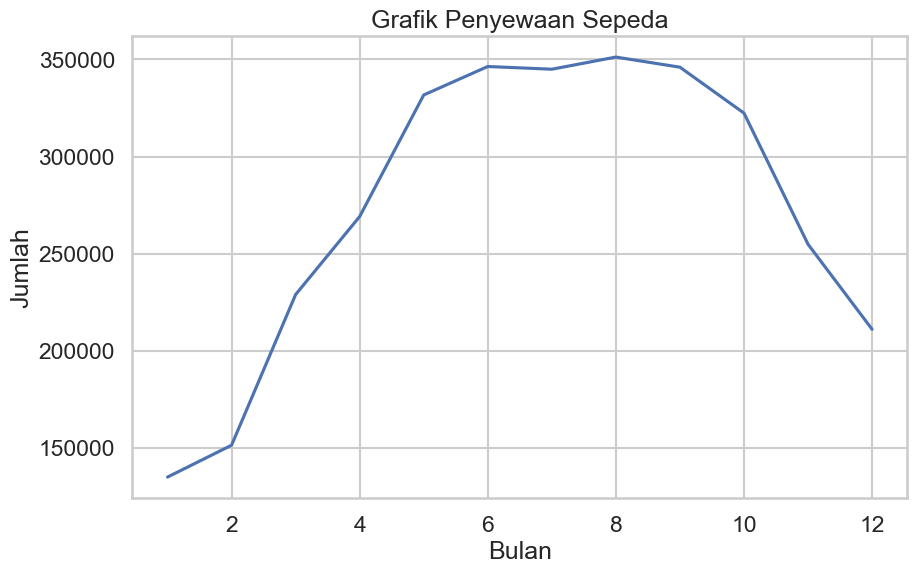

In [294]:
plt.figure(figsize=(10,6))
sns.lineplot(data=jumlah_perbulan, x='mnth', y='cnt')
plt.title('Grafik Penyewaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

### Banyak peminat untuk menyewa sepeda dalam cuaca cerah

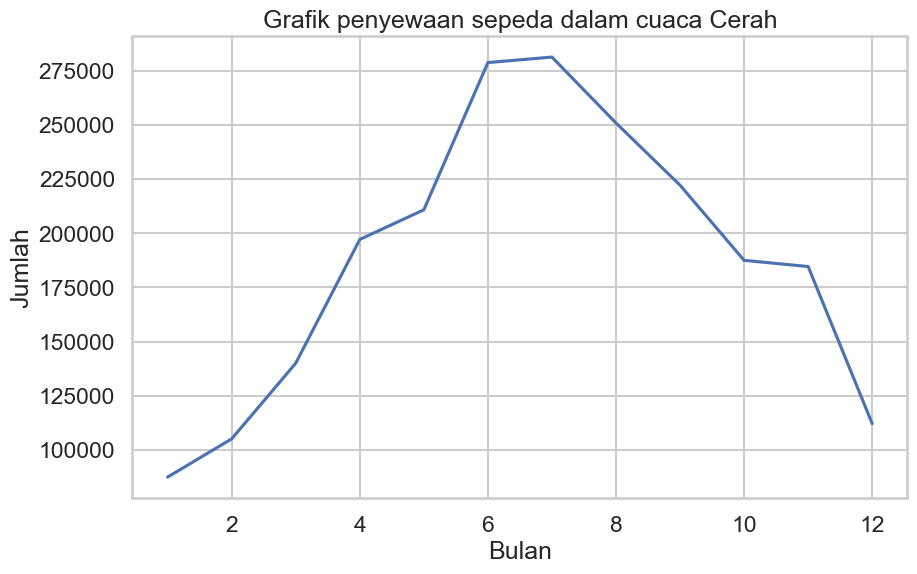

In [295]:
penyewa_cerah = day_raw[day_raw['weathersit'] == 'Cerah'].groupby(by='mnth')['cnt'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=penyewa_cerah, x='mnth', y='cnt')
plt.title('Grafik penyewaan sepeda dalam cuaca Cerah')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

### Banyak peminat untuk menyewa sepeda dalam cuaca gerimis

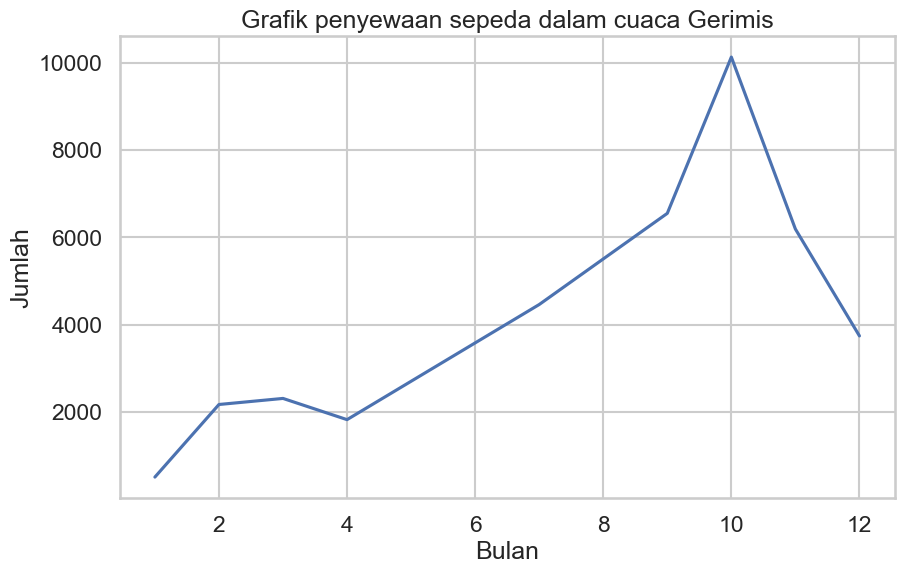

In [296]:
penyewa_gerimis = day_raw[day_raw['weathersit'] == 'Gerimis'].groupby(by='mnth')['cnt'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=penyewa_gerimis, x='mnth', y='cnt')
plt.title('Grafik penyewaan sepeda dalam cuaca Gerimis')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

### Banyak peminat untuk menyewa sepeda dalam cuaca mendung

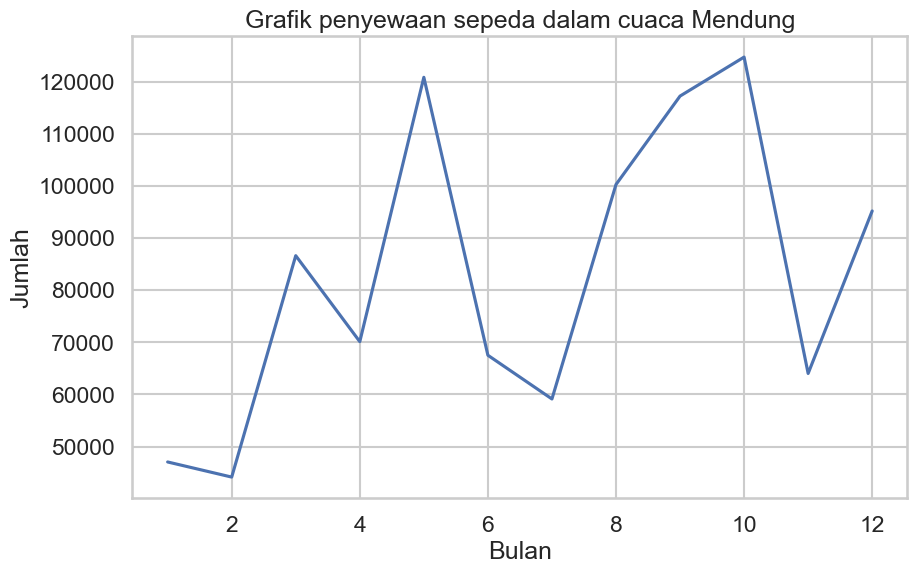

In [297]:
penyewa_mendung = day_raw[day_raw['weathersit'] == 'Mendung'].groupby(by='mnth')['cnt'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=penyewa_mendung, x='mnth', y='cnt')
plt.title('Grafik penyewaan sepeda dalam cuaca Mendung')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

## Clustering

### Manual Grouping
- Dalam cuaca apa dan bulan apa yang cocok untuk menyewakan sepeda supaya mendapatkan banyak pelanggan?

In [298]:
sorted = day_raw.sort_values(by="cnt", ascending=False)
sorted.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
623,624,2012-09-15,3,1,9,0,6,0,Cerah,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,15,9,2012
637,638,2012-09-29,4,1,9,0,6,0,Cerah,0.542500,0.530296,0.542917,0.227604,2589,5966,8555,29,9,2012
630,631,2012-09-22,3,1,9,0,6,0,Cerah,0.650000,0.610488,0.646667,0.283583,2512,5883,8395,22,9,2012
447,448,2012-03-23,2,1,3,0,5,1,Mendung,0.601667,0.570067,0.694167,0.116300,2469,5893,8362,23,3,2012
504,505,2012-05-19,2,1,5,0,6,0,Cerah,0.600000,0.566908,0.456250,0.083975,3410,4884,8294,19,5,2012


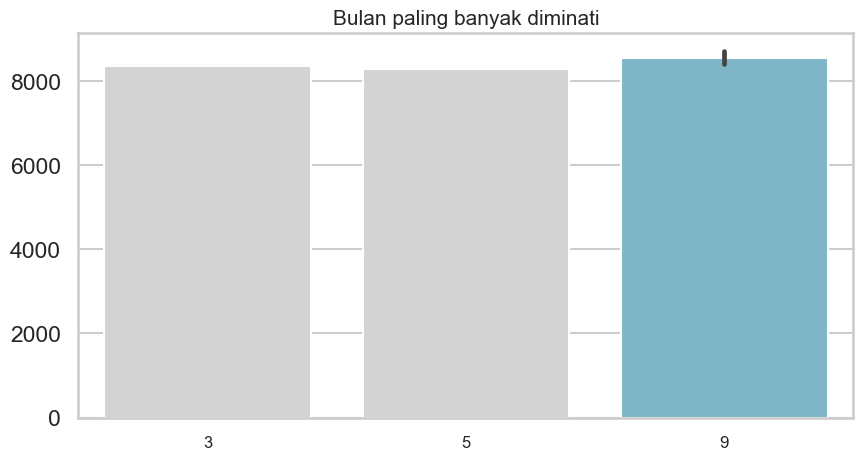

In [299]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
    y="cnt", 
    x="mnth",
    data=sorted.head(5),
    palette=colors_
)
plt.title("Bulan paling banyak diminati", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [300]:
# Ambil hanya satu nama bulan!
paling_banyak = sorted.head(5).drop_duplicates(subset=['month']).reset_index()

print('Berikut bulan yang banyak diminati serta cuaca nya: ')
for index, row in paling_banyak.iterrows():
    month_name = calendar.month_name[row['month']]
    weather_name = row['weathersit']
    print(f'{month_name} dengan cuaca {weather_name}')

bulan_terbaik = sorted.head(1).reset_index()
print(f'Kesimpulan: bulan {(calendar.month_name[bulan_terbaik["month"].iloc[0]])} adalah bulan terbaik untuk menyewakan sepeda dengan cuaca {bulan_terbaik["weathersit"].iloc[0]} adalah yang direkomendasikan!')

Berikut bulan yang banyak diminati serta cuaca nya: 
September dengan cuaca Cerah
March dengan cuaca Mendung
May dengan cuaca Cerah
Kesimpulan: bulan September adalah bulan terbaik untuk menyewakan sepeda dengan cuaca Cerah adalah yang direkomendasikan!


# Insight
Bulan september adalah bulan yang cocok untuk menyewakan sepeda anda, dikarenakan banyak peminat pada bulan tersebut serta cuaca cerah akan menambah penyewa lebih banyak.